In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## setting the start and end date
start_date = '1950-01-01'
end_date = '2023-08-14'
ticker = 'IBM'
## fetching data from yahoo
df = yf.download(ticker,start=start_date, end=end_date)
print(df)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1962-01-02    7.374124    7.374124    7.291268    7.291268    1.573411   
1962-01-03    7.291268    7.355003    7.291268    7.355003    1.587163   
1962-01-04    7.355003    7.355003    7.278521    7.281708    1.571348   
1962-01-05    7.272148    7.272148    7.125558    7.138305    1.540402   
1962-01-08    7.131931    7.131931    6.947100    7.004461    1.511519   
...                ...         ...         ...         ...         ...   
2023-08-07  145.000000  146.500000  144.929993  146.179993  144.516922   
2023-08-08  145.699997  146.149994  144.110001  145.910004  144.250000   
2023-08-09  144.940002  144.940002  142.300003  142.490005  142.490005   
2023-08-10  143.039993  144.580002  142.690002  143.250000  143.250000   
2023-08-11  143.119995  143.449997  142.210

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15509 entries, 1962-01-02 to 2023-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15509 non-null  float64
 1   High       15509 non-null  float64
 2   Low        15509 non-null  float64
 3   Close      15509 non-null  float64
 4   Adj Close  15509 non-null  float64
 5   Volume     15509 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 848.1 KB


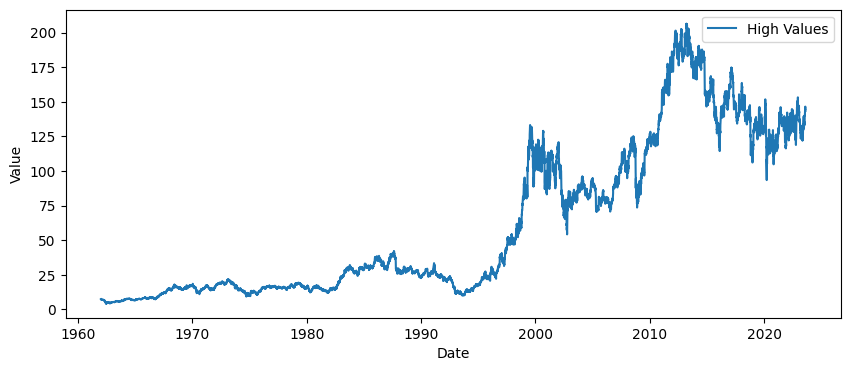

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['High'], label='High Values')
plt.legend()
plt.savefig('mishtha apple high price')
plt.show()

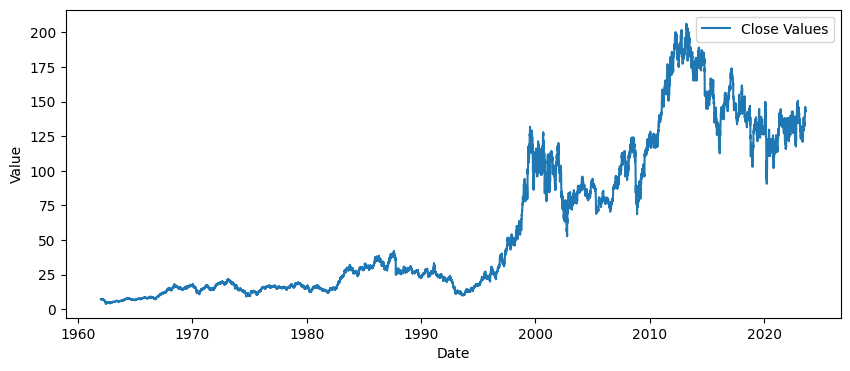

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['Close'], label='Close Values')
plt.legend()
plt.savefig('mishtha apple close price')
plt.show()

In [ ]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.374124,7.374124,7.291268,7.291268,1.573411,407940
1,1962-01-03,7.291268,7.355003,7.291268,7.355003,1.587163,305955
2,1962-01-04,7.355003,7.355003,7.278521,7.281708,1.571348,274575
3,1962-01-05,7.272148,7.272148,7.125558,7.138305,1.540402,384405
4,1962-01-08,7.131931,7.131931,6.947100,7.004461,1.511519,572685
...,...,...,...,...,...,...,...
15504,2023-08-07,145.000000,146.500000,144.929993,146.179993,144.516922,3438700
15505,2023-08-08,145.699997,146.149994,144.110001,145.910004,144.250000,4654600
15506,2023-08-09,144.940002,144.940002,142.300003,142.490005,142.490005,4072900
15507,2023-08-10,143.039993,144.580002,142.690002,143.250000,143.250000,4735800


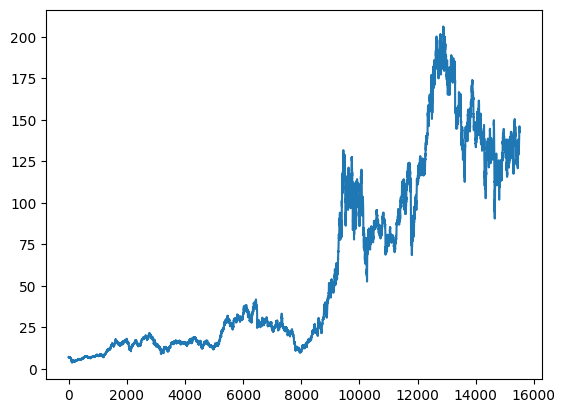

In [ ]:
plt.plot(df.Close)

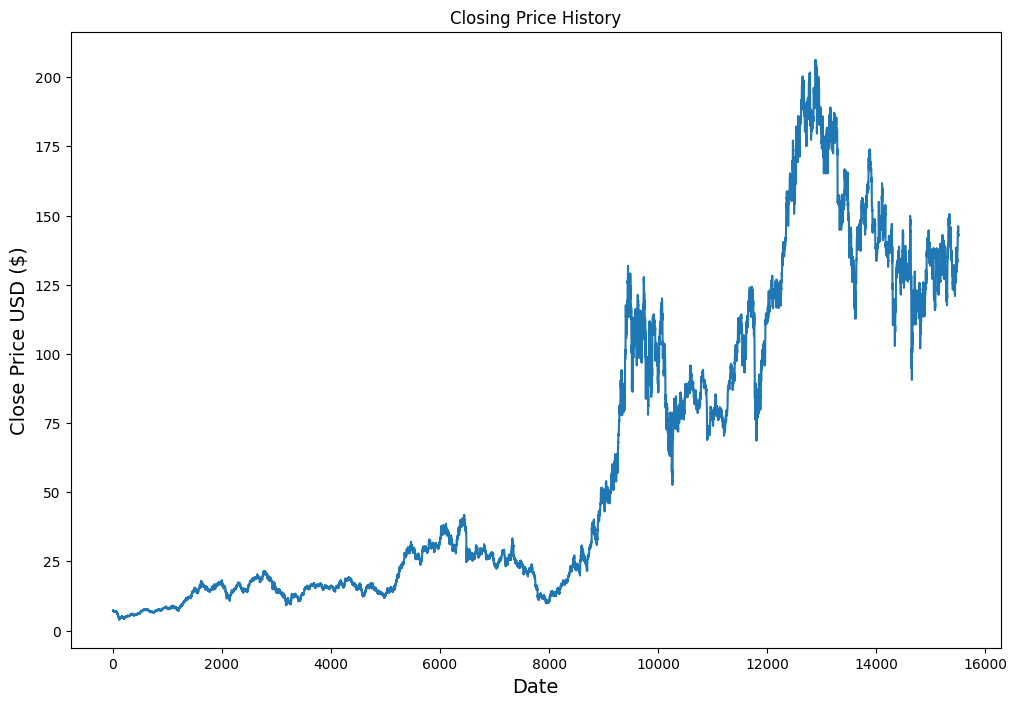

In [ ]:
#visualize the closing price history
plt.figure(figsize=(12,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.show()

In [ ]:
import math
#create a new dataframe with only the "Close column"
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on (95%)
training = math.ceil(len(dataset)*.95)

training

14734

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Scale the data
scaler =  MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01675168],
       [0.01706656],
       [0.01670445],
       ...,
       [0.68469934],
       [0.68845408],
       [0.6878118 ]])

In [ ]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training, :]
#split the data into X_train and y_train data sets
X_train = []
y_train = []

In [ ]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training, :]
#split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(X_train)
        print(y_train)
        print()

[array([0.01675168, 0.01706656, 0.01670445, 0.01599597, 0.01533471,
       0.01574406, 0.01580704, 0.0161849 , 0.01624787, 0.01640531,
       0.01602746, 0.01546067, 0.01555513, 0.01558662, 0.01552364,
       0.01517728, 0.01536621, 0.01498835, 0.01481516, 0.01423263,
       0.01380754, 0.01486239, 0.0156496 , 0.01587002, 0.01542918,
       0.01546067, 0.01549216, 0.01552364, 0.01577555, 0.01580704,
       0.01524025, 0.01517728, 0.01505132, 0.01501984, 0.01467346,
       0.01468921, 0.0144373 , 0.01454751, 0.01442156, 0.01448454,
       0.01454751, 0.01495686, 0.01524025, 0.0151143 , 0.01514579,
       0.015256  , 0.01533471, 0.01555513, 0.01552364, 0.01549216,
       0.01542918, 0.01536621, 0.01552364, 0.01561811, 0.01539769,
       0.01542918, 0.01505132, 0.01517728, 0.01516153, 0.01451603])]
[0.014704956884173323]



In [ ]:
#convert the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

#reshape the data (MLP expects 2 dimentionals)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_train.shape

(14674, 60)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import tensorflow as tf
# Create the regressor model
regressor = Sequential()

# Add the RNN layer
#regressor.add(RNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#regressor.add(SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))


# Add the first RNN-Bidirectional LSTM layer with Dropout regularisation
regressor.add(tf.keras.layers.SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.2))

# Adding a GRU layer
#regressor.add(GRU(units=16))

# Add the second RNN-Bidirectional LSTM layer
regressor.add(tf.keras.layers.SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.3))

# Adding a GRU layer
#regressor.add(GRU(units=18))

# Add the third RNN-Bidirectional LSTM layer
regressor.add(tf.keras.layers.SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.4))

# Adding a GRU layer
#regressor.add(GRU(units=20))

# Add the fourth RNN-Bidirectional LSTM layer
regressor.add(tf.keras.layers.SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.5))



# Add the output layer
regressor.add(Dense(units=1))
regressor.add(Dense(150, activation='relu', input_dim = 60))
regressor.add(Dense(150, activation='relu'))
regressor.add(Dense(1))


# Compile the RNN
#regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 bidirectional (Bidirectiona  (None, 60, 100)          40400     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 50)            7550      
                                                                 
 bidirectional_1 (Bidirectio  (None, 60, 100)          40400     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0

In [ ]:
#compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
history = regressor.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
459/459 [==============================] - 163s 311ms/step - loss: 0.0063
Epoch 2/10
459/459 [==============================] - 142s 309ms/step - loss: 0.0012
Epoch 3/10
459/459 [==============================] - 141s 307ms/step - loss: 8.7795e-04
Epoch 4/10
459/459 [==============================] - 143s 312ms/step - loss: 8.1783e-04
Epoch 5/10
459/459 [==============================] - 144s 314ms/step - loss: 7.3026e-04
Epoch 6/10
459/459 [==============================] - 143s 311ms/step - loss: 7.3290e-04
Epoch 7/10
459/459 [==============================] - 140s 306ms/step - loss: 6.7468e-04
Epoch 8/10
459/459 [==============================] - 143s 312ms/step - loss: 6.4732e-04
Epoch 9/10
459/459 [==============================] - 144s 313ms/step - loss: 5.8022e-04
Epoch 10/10
459/459 [==============================] - 141s 308ms/step - loss: 5.0777e-04


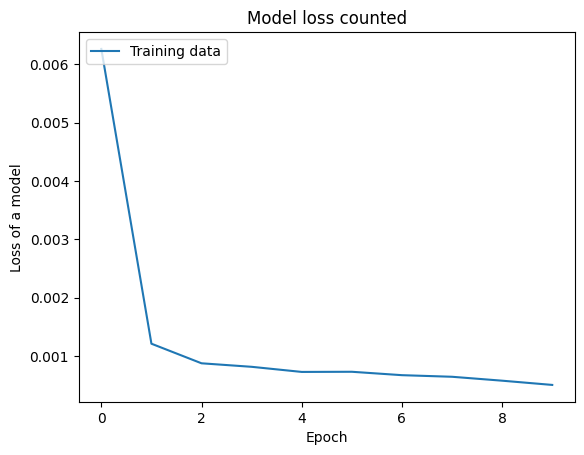

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Test data'], loc='upper left')
plt.show()

In [ ]:
#create the testing data set
#create a new array containing scaled values from index
test_data = scaled_data[training - 60: , : ]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

In [ ]:
#get the models predicted price values
predictions = regressor.predict(x_test)
predictions = scaler.inverse_transform(predictions)

25/25 [==============================] - 6s 65ms/step


In [ ]:
#get the root mean squared error (RMSE) (lower values better fit)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
print(rmse)

3.564833570911038


In [ ]:
mse = (np.mean( predictions - y_test)**2)
print(mse)

12.708038388294344


In [ ]:
from sklearn.metrics import mean_absolute_error
#get the mean absolute error (average of the forecast error values - all of em forced to be positive)
mae = mean_absolute_error(y_test, predictions)
print(mae)

3.8254683562247984


In [ ]:
#define MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#get MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print(mape)

3.0009996845600884


<ipython-input-27-4d2a747520e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


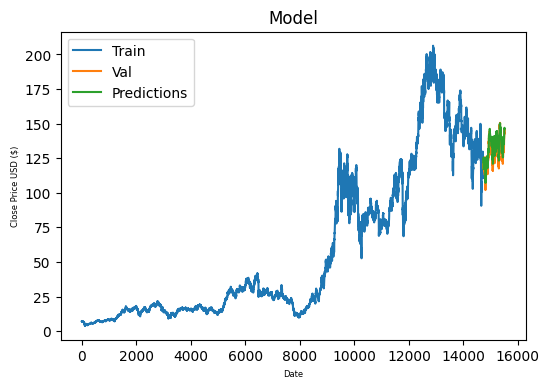

In [ ]:
#plot the data
train = data[:training]
valid = data[training:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(6,4))
plt.title('Model')
plt.xlabel('Date', fontsize = 6)
plt.ylabel('Close Price USD ($)', fontsize=6)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.savefig('mishtha bilstm rnn')
plt.show()

In [ ]:
import datetime


# Assuming 'last_date' is defined properly
# Define the number of days for the next 7 days
days_in_future = 10

import pandas as pd

# Assuming 'data_M' is a DataFrame with a 'Date' column containing dates
# Convert the last date to a pandas Timestamp object
last_date = pd.to_datetime(df['Date'].iat[-1])

# Generate the list of dates for forecast of crude oil prices for  the next 7 days
next_10_days = [last_date + datetime.timedelta(days=i) for i in range(1, days_in_future + 1)]

# Assuming 'next_7_days' and 'predicted_stock_price' are defined properly

# Print the predicted prices for the next 31 days
for date, price in zip(next_10_days[:10], predictions[:10]):
    print(f"{date.date()}: {price}")

2023-08-12: [117.170425]
2023-08-13: [117.92725]
2023-08-14: [118.81103]
2023-08-15: [119.99022]
2023-08-16: [121.38756]
2023-08-17: [122.87079]
2023-08-18: [124.33734]
2023-08-19: [125.29879]
2023-08-20: [125.520256]
2023-08-21: [125.28272]


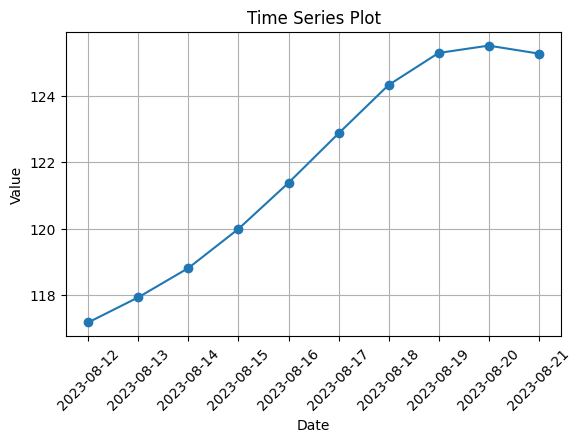

In [ ]:
import matplotlib.pyplot as plt
import datetime

# Data
dates = [
    '2023-08-12',
    '2023-08-13',
    '2023-08-14',
    '2023-08-15',
    '2023-08-16',
    '2023-08-17',
    '2023-08-18',
    '2023-08-19',
    '2023-08-20',
    '2023-08-21'
]

values = [
    117.1704,
    117.92725,
    118.81,
    119.99,
    121.38,
    122.870,
    124.33,
    125.298,
    125.52,
    125.28
]

# Convert dates to datetime objects
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]

# Create a time series plot
plt.figure(figsize=(6, 4))
plt.plot(dates, values, marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('mishtha forecasting')
plt.show()

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## setting the start and end date
start_date = '1950-01-01'
end_date = '2023-08-14'
ticker = 'IBM'
## fetching data from yahoo
df = yf.download(ticker,start=start_date, end=end_date)
print(df)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1962-01-02    7.374124    7.374124    7.291268    7.291268    1.573411   
1962-01-03    7.291268    7.355003    7.291268    7.355003    1.587163   
1962-01-04    7.355003    7.355003    7.278521    7.281708    1.571348   
1962-01-05    7.272148    7.272148    7.125558    7.138305    1.540402   
1962-01-08    7.131931    7.131931    6.947100    7.004461    1.511519   
...                ...         ...         ...         ...         ...   
2023-08-07  145.000000  146.500000  144.929993  146.179993  144.516922   
2023-08-08  145.699997  146.149994  144.110001  145.910004  144.250000   
2023-08-09  144.940002  144.940002  142.300003  142.490005  142.490005   
2023-08-10  143.039993  144.580002  142.690002  143.250000  143.250000   
2023-08-11  143.119995  143.449997  142.210

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15509 entries, 1962-01-02 to 2023-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15509 non-null  float64
 1   High       15509 non-null  float64
 2   Low        15509 non-null  float64
 3   Close      15509 non-null  float64
 4   Adj Close  15509 non-null  float64
 5   Volume     15509 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 848.1 KB


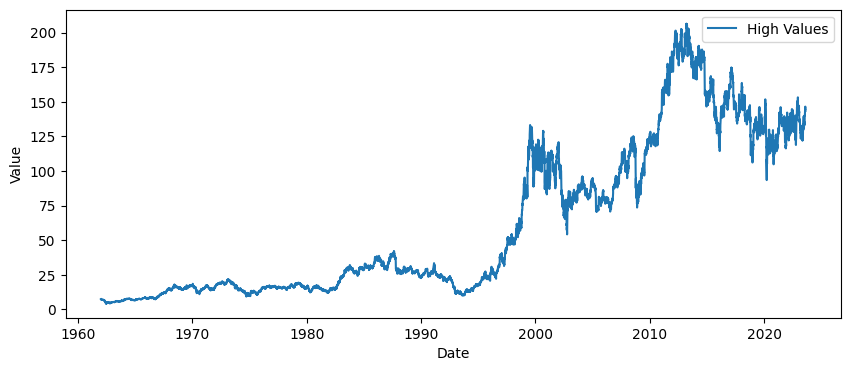

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['High'], label='High Values')
plt.legend()
plt.savefig('mishtha apple high price')
plt.show()

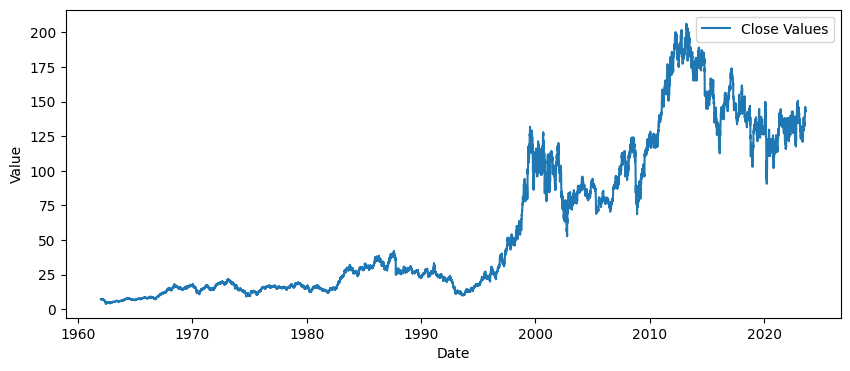

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['Close'], label='Close Values')
plt.legend()
plt.savefig('mishtha apple close price')
plt.show()

In [ ]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.374124,7.374124,7.291268,7.291268,1.573410,407940
1,1962-01-03,7.291268,7.355003,7.291268,7.355003,1.587164,305955
2,1962-01-04,7.355003,7.355003,7.278521,7.281708,1.571347,274575
3,1962-01-05,7.272148,7.272148,7.125558,7.138305,1.540403,384405
4,1962-01-08,7.131931,7.131931,6.947100,7.004461,1.511520,572685
...,...,...,...,...,...,...,...
15504,2023-08-07,145.000000,146.500000,144.929993,146.179993,144.516922,3438700
15505,2023-08-08,145.699997,146.149994,144.110001,145.910004,144.250000,4654600
15506,2023-08-09,144.940002,144.940002,142.300003,142.490005,142.490005,4072900
15507,2023-08-10,143.039993,144.580002,142.690002,143.250000,143.250000,4735800


<ipython-input-55-3c852398583e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


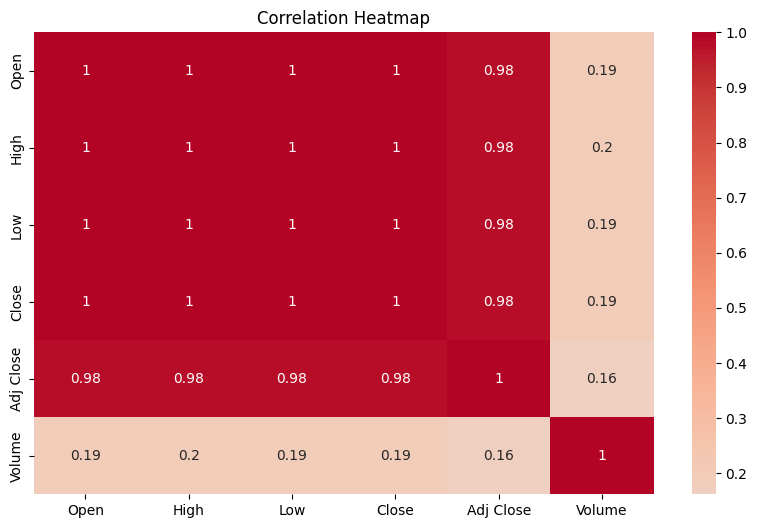

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.savefig('heatmap')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):

    #Parameters:
    # y_true (array-like): The ground truth (actual) values.
    # y_pred (array-like): The predicted values.


    return mean_absolute_error(y_true, y_pred) / np.mean(y_true) * 100

In [ ]:
from sklearn.metrics import mean_squared_error

def mean_square_error(y_true, y_pred):
   # y_true (array-like): The ground truth (actual) values.
   #  y_pred (array-like): The predicted values.



    return mean_squared_error(y_true, y_pred)

In [ ]:
import math
def root_mean_square_error(y_true, y_pred):
    RMSE_Value = math.sqrt(mean_squared_error(y_true, y_pred))
    return RMSE_Value


In [ ]:
# Define the size of the training set
train_size = int(len(df) * 0.95)  # 95% of the data for training

# Split the data into training and testing sets
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Print the shapes of the split sets
print(train.shape, test.shape)

(14733, 6) (776, 6)


In [ ]:
training_data = train.filter(['High'])
training_set = training_data.values
testing_data = test.filter(['High'])
testing_set = testing_data.values
print(training_set.shape, testing_set.shape)

(14733, 1) (776, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Scale the training dataset
scaled_training_set = scaler.fit_transform(training_set)
# Scale the test dataset using the same scaler
scaled_testing_set = scaler.transform(testing_set)

print(scaled_training_set.shape, scaled_testing_set.shape)

(14733, 1) (776, 1)


In [ ]:
step_count = 50
X_train = []
y_train = []

for i in range(len(train) - step_count):
    X_train.append(scaled_training_set[i:i + step_count, 0])
    y_train.append(scaled_training_set[step_count + i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train = y_train.reshape(y_train.shape[0])

print(X_train.shape, y_train.shape)


(14683, 50) (14683,)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the CNN model
cnn_model = Sequential()

# Add a 1D convolutional layer with 32 filters, kernel size 3, and ReLU activation
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer with pool size 2
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the previous layer
cnn_model.add(Flatten())

# Add a fully connected dense layer with 64 units and ReLU activation
cnn_model.add(Dense(64, activation='relu'))

# Add a final dense layer with 1 unit and linear activation for regression
cnn_model.add(Dense(1, activation='linear'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
cnn_model.summary()

#compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 64)                49216     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49,409
Trainable params: 49,409
Non-trainable params: 0
____________________________________________________

In [ ]:
#train the model
history = cnn_model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
918/918 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 2/20
918/918 [==============================] - 3s 3ms/step - loss: 2.1311e-04
Epoch 3/20
918/918 [==============================] - 3s 3ms/step - loss: 1.7820e-04
Epoch 4/20
918/918 [==============================] - 2s 3ms/step - loss: 1.4586e-04
Epoch 5/20
918/918 [==============================] - 2s 3ms/step - loss: 1.2360e-04
Epoch 6/20
918/918 [==============================] - 3s 3ms/step - loss: 1.0221e-04
Epoch 7/20
918/918 [==============================] - 3s 3ms/step - loss: 8.6498e-05
Epoch 8/20
918/918 [==============================] - 3s 3ms/step - loss: 8.6401e-05
Epoch 9/20
918/918 [==============================] - 3s 4ms/step - loss: 6.3471e-05
Epoch 10/20
918/918 [==============================] - 2s 3ms/step - loss: 7.2943e-05
Epoch 11/20
918/918 [==============================] - 3s 4ms/step - loss: 6.4148e-05
Epoch 12/20
918/918 [==============================] - 3s 3ms/step 

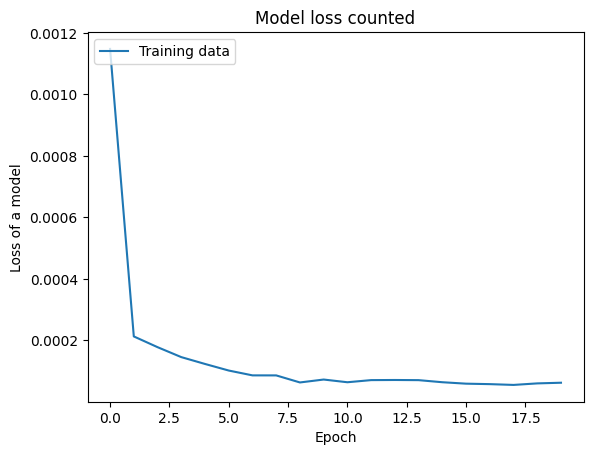

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Training data'], loc='upper left')
plt.show()

In [ ]:
X_test = []
y_test = []

for i in range(len(test) - step_count):
    X_test.append(scaled_testing_set[i:i + step_count, 0])
    y_test.append(scaled_testing_set[step_count + i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
y_test = y_test.reshape(y_test.shape[0])

print(X_test.shape, y_test.shape)

(726, 50) (726,)


In [ ]:
#train the model
history = cnn_model.fit(X_test, y_test, batch_size=16, epochs=20)

Epoch 1/20
46/46 [==============================] - 0s 3ms/step - loss: 1.2568e-04
Epoch 2/20
46/46 [==============================] - 0s 3ms/step - loss: 1.5206e-04
Epoch 3/20
46/46 [==============================] - 0s 3ms/step - loss: 1.2109e-04
Epoch 4/20
46/46 [==============================] - 0s 3ms/step - loss: 1.1804e-04
Epoch 5/20
46/46 [==============================] - 0s 3ms/step - loss: 1.0706e-04
Epoch 6/20
46/46 [==============================] - 0s 5ms/step - loss: 1.0515e-04
Epoch 7/20
46/46 [==============================] - 0s 5ms/step - loss: 1.3373e-04
Epoch 8/20
46/46 [==============================] - 0s 4ms/step - loss: 1.2629e-04
Epoch 9/20
46/46 [==============================] - 0s 4ms/step - loss: 1.5590e-04
Epoch 10/20
46/46 [==============================] - 0s 5ms/step - loss: 1.3604e-04
Epoch 11/20
46/46 [==============================] - 0s 4ms/step - loss: 1.1735e-04
Epoch 12/20
46/46 [==============================] - 0s 5ms/step - loss: 1.2848e-04
E

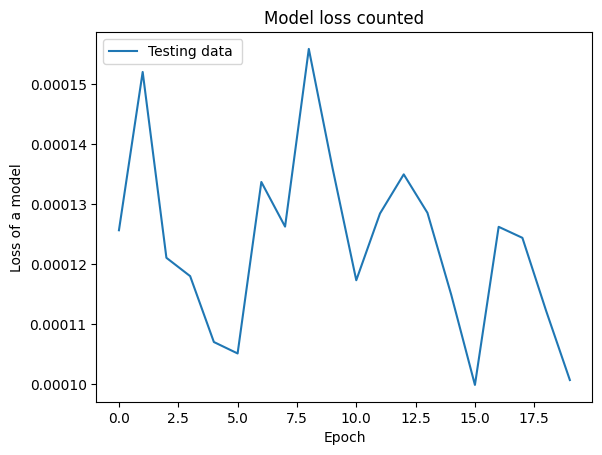

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Testing data '], loc='upper left')
plt.show()

In [ ]:
predict = cnn_model.predict(X_test)
predict_original_scale = predict * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_test_original = y_test * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]

23/23 [==============================] - 0s 2ms/step


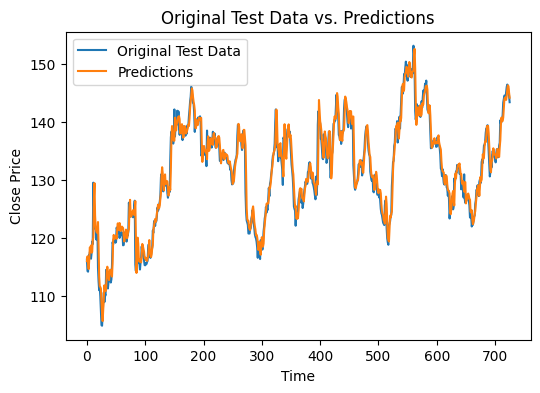

In [ ]:
plt.figure(figsize=(6, 4))

# Plot original test data
plt.plot(y_test_original, label='Original Test Data')

# Plot predicted data
plt.plot(predict_original_scale, label='Predictions')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Original Test Data vs. Predictions')
plt.legend()
plt.savefig('Mishtha test and actual prediction')
plt.show()

In [ ]:
mape = mean_absolute_percentage_error(y_test_original, predict_original_scale)
mse = mean_square_error(y_test_original, predict_original_scale)
rmse = root_mean_square_error(y_test_original, predict_original_scale)
print(' model performance')
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

 model performance
RMSE: 2.6182364213026186
MSE: 6.855161957835542
MAPE: 1.4684122517276217


In [ ]:
import datetime


# Assuming 'last_date' is defined properly
# Define the number of days for the next 7 days
days_in_future = 10

import pandas as pd

# Assuming 'data_M' is a DataFrame with a 'Date' column containing dates
# Convert the last date to a pandas Timestamp object
last_date = pd.to_datetime(df['Date'].iat[-1])

# Generate the list of dates for forecast of crude oil prices for  the next 7 days
next_10_days = [last_date + datetime.timedelta(days=i) for i in range(1, days_in_future + 1)]

# Assuming 'next_7_days' and 'predicted_stock_price' are defined properly

# Print the predicted prices for the next 31 days
for date, price in zip(next_10_days[:10], predict_original_scale[:10]):
    print(f"{date.date()}: {price}")

2023-08-12: [116.77786]
2023-08-13: [117.258415]
2023-08-14: [116.93279]
2023-08-15: [115.310425]
2023-08-16: [116.88862]
2023-08-17: [119.08568]
2023-08-18: [118.61241]
2023-08-19: [119.41345]
2023-08-20: [118.383316]
2023-08-21: [118.614655]


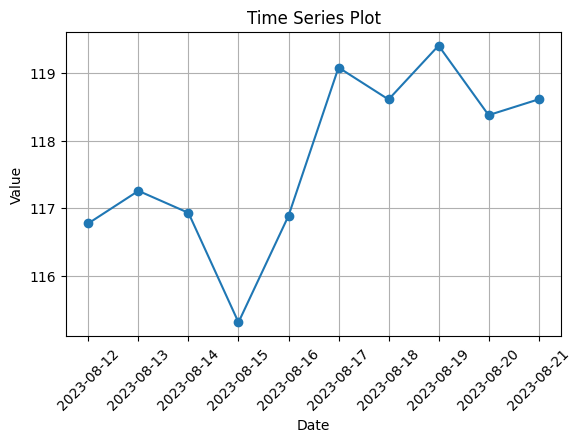

In [ ]:
import matplotlib.pyplot as plt
import datetime

# Data
dates = [
    '2023-08-12',
    '2023-08-13',
    '2023-08-14',
    '2023-08-15',
    '2023-08-16',
    '2023-08-17',
    '2023-08-18',
    '2023-08-19',
    '2023-08-20',
    '2023-08-21'
]

values = [
    116.777,
    117.258,
    116.932,
    115.310,
    116.888,
    119.0856,
    118.612,
    119.41,
    118.38,
    118.614
]

# Convert dates to datetime objects
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]

# Create a time series plot
plt.figure(figsize=(6, 4))
plt.plot(dates, values, marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('mishtha forecasting')
plt.show()

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## setting the start and end date
start_date = '1950-01-01'
end_date = '2023-08-14'
ticker = 'IBM'
## fetching data from yahoo
df = yf.download(ticker,start=start_date, end=end_date)
print(df)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1962-01-02    7.374124    7.374124    7.291268    7.291268    1.573411   
1962-01-03    7.291268    7.355003    7.291268    7.355003    1.587164   
1962-01-04    7.355003    7.355003    7.278521    7.281708    1.571348   
1962-01-05    7.272148    7.272148    7.125558    7.138305    1.540402   
1962-01-08    7.131931    7.131931    6.947100    7.004461    1.511518   
...                ...         ...         ...         ...         ...   
2023-08-07  145.000000  146.500000  144.929993  146.179993  144.516922   
2023-08-08  145.699997  146.149994  144.110001  145.910004  144.250000   
2023-08-09  144.940002  144.940002  142.300003  142.490005  142.490005   
2023-08-10  143.039993  144.580002  142.690002  143.250000  143.250000   
2023-08-11  143.119995  143.449997  142.210

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15509 entries, 1962-01-02 to 2023-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15509 non-null  float64
 1   High       15509 non-null  float64
 2   Low        15509 non-null  float64
 3   Close      15509 non-null  float64
 4   Adj Close  15509 non-null  float64
 5   Volume     15509 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 848.1 KB


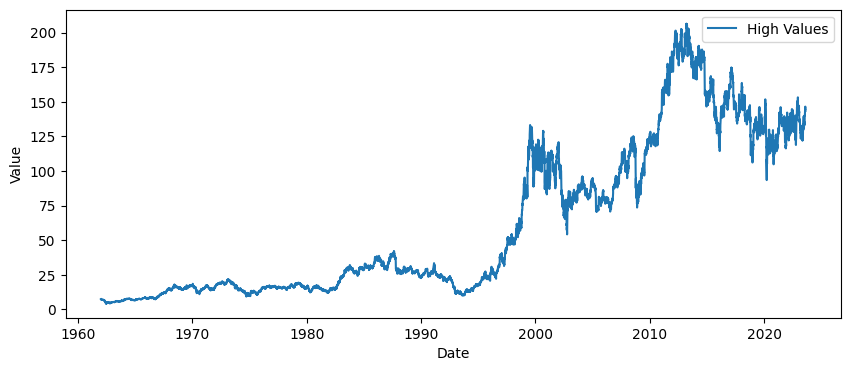

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['High'], label='High Values')
plt.legend()
plt.savefig('mishtha apple high price')
plt.show()

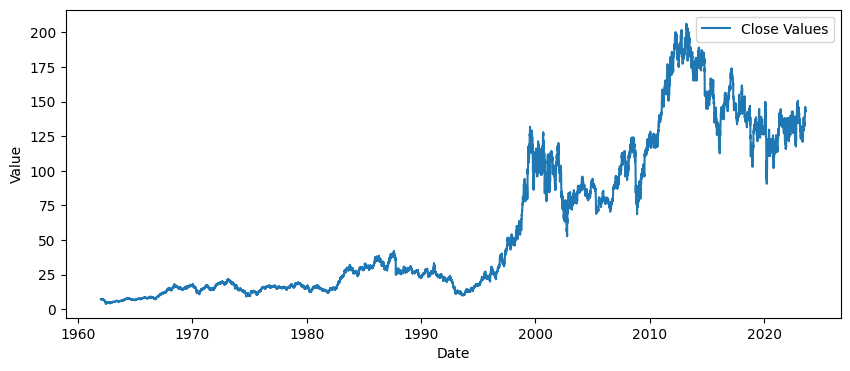

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['Close'], label='Close Values')
plt.legend()
plt.savefig('mishtha apple close price')
plt.show()

In [ ]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.374124,7.374124,7.291268,7.291268,1.573411,407940
1,1962-01-03,7.291268,7.355003,7.291268,7.355003,1.587164,305955
2,1962-01-04,7.355003,7.355003,7.278521,7.281708,1.571348,274575
3,1962-01-05,7.272148,7.272148,7.125558,7.138305,1.540402,384405
4,1962-01-08,7.131931,7.131931,6.947100,7.004461,1.511518,572685
...,...,...,...,...,...,...,...
15504,2023-08-07,145.000000,146.500000,144.929993,146.179993,144.516922,3438700
15505,2023-08-08,145.699997,146.149994,144.110001,145.910004,144.250000,4654600
15506,2023-08-09,144.940002,144.940002,142.300003,142.490005,142.490005,4072900
15507,2023-08-10,143.039993,144.580002,142.690002,143.250000,143.250000,4735800


<ipython-input-33-096c9588a5d9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


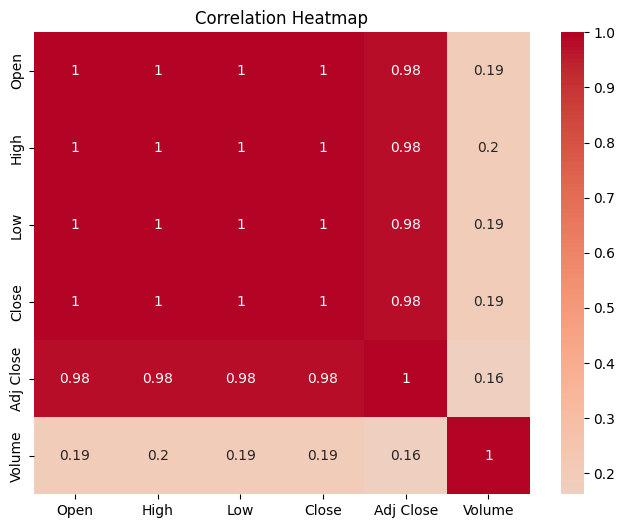

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.savefig('heatmap')
plt.show()

In [ ]:
# Define the size of the training set
train_size = int(len(df) * 0.95)  # 95% of the data for training

# Split the data into training and testing sets
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Print the shapes of the split sets
print(train.shape, test.shape)

(14733, 7) (776, 7)


In [ ]:
training_data = train.filter(['High'])
training_set = training_data.values
testing_data = test.filter(['High'])
testing_set = testing_data.values
print(training_set.shape, testing_set.shape)

(14733, 1) (776, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Scale the training dataset
scaled_training_set = scaler.fit_transform(training_set)
# Scale the test dataset using the same scaler
scaled_testing_set = scaler.transform(testing_set)

print(scaled_training_set.shape, scaled_testing_set.shape)

(14733, 1) (776, 1)


In [ ]:
step_count = 50
X_train = []
y_train = []

for i in range(len(train) - step_count):
    X_train.append(scaled_training_set[i:i + step_count, 0])
    y_train.append(scaled_training_set[step_count + i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train = y_train.reshape(y_train.shape[0])

print(X_train.shape, y_train.shape)

(14683, 50) (14683,)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense

length = 50  # Number of time steps in the input sequence
n_features = 1  # Number of features at each time step

model = Sequential()

# Add a Simple RNN layer with 30 units and input shape (length, n_features)
model.add(SimpleRNN(30, input_shape=(length, n_features)))

# Add a Dropout layer with dropout rate 0.2
model.add(Dropout(rate=0.2))

# Add a Dense output layer with 1 unit (for regression)
model.add(Dense(1))

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history = model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
918/918 [==============================] - 10s 9ms/step - loss: 0.0029
Epoch 2/20
918/918 [==============================] - 9s 9ms/step - loss: 0.0012
Epoch 3/20
918/918 [==============================] - 7s 8ms/step - loss: 9.7987e-04
Epoch 4/20
918/918 [==============================] - 9s 10ms/step - loss: 8.2290e-04
Epoch 5/20
918/918 [==============================] - 8s 9ms/step - loss: 7.7115e-04
Epoch 6/20
918/918 [==============================] - 9s 10ms/step - loss: 7.5963e-04
Epoch 7/20
918/918 [==============================] - 9s 10ms/step - loss: 7.4869e-04
Epoch 8/20
918/918 [==============================] - 9s 10ms/step - loss: 7.2229e-04
Epoch 9/20
918/918 [==============================] - 9s 10ms/step - loss: 7.2634e-04
Epoch 10/20
918/918 [==============================] - 9s 10ms/step - loss: 7.1856e-04
Epoch 11/20
918/918 [==============================] - 9s 10ms/step - loss: 7.1878e-04
Epoch 12/20
918/918 [==============================] - 8s 8ms/s

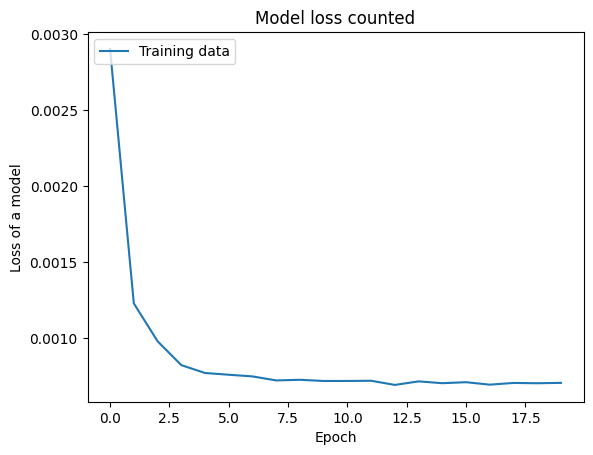

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Training data'], loc='upper left')
plt.show()

In [ ]:
X_test = []
y_test = []

for i in range(len(test) - step_count):
    X_test.append(scaled_testing_set[i:i + step_count, 0])
    y_test.append(scaled_testing_set[step_count + i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
y_test = y_test.reshape(y_test.shape[0])

print(X_test.shape, y_test.shape)

(726, 50) (726,)


In [ ]:
#train the model
history = model.fit(X_test, y_test, batch_size=16, epochs=20)

Epoch 1/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 2/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 3/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0010
Epoch 4/20
46/46 [==============================] - 0s 8ms/step - loss: 9.6293e-04
Epoch 5/20
46/46 [==============================] - 0s 8ms/step - loss: 9.3148e-04
Epoch 6/20
46/46 [==============================] - 0s 9ms/step - loss: 7.5507e-04
Epoch 7/20
46/46 [==============================] - 0s 8ms/step - loss: 8.3628e-04
Epoch 8/20
46/46 [==============================] - 0s 8ms/step - loss: 7.3472e-04
Epoch 9/20
46/46 [==============================] - 0s 9ms/step - loss: 7.0980e-04
Epoch 10/20
46/46 [==============================] - 0s 8ms/step - loss: 6.3190e-04
Epoch 11/20
46/46 [==============================] - 0s 8ms/step - loss: 6.0634e-04
Epoch 12/20
46/46 [==============================] - 0s 9ms/step - loss: 5.5671e-04
Epoch 13/20
4

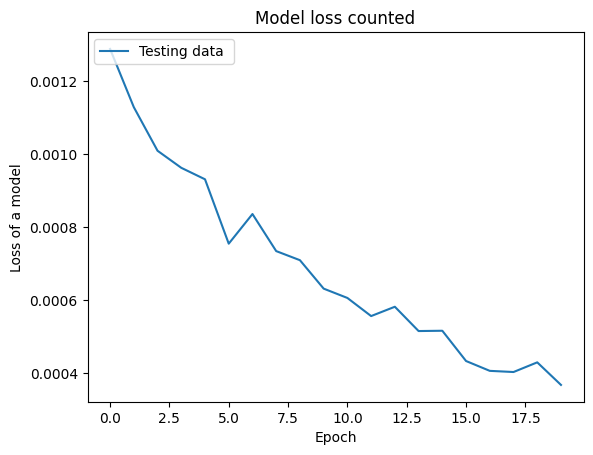

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Testing data '], loc='upper left')
plt.show()

In [ ]:
predict = model.predict(X_test)
predict_original_scale = predict * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_test_original = y_test * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]

23/23 [==============================] - 0s 3ms/step


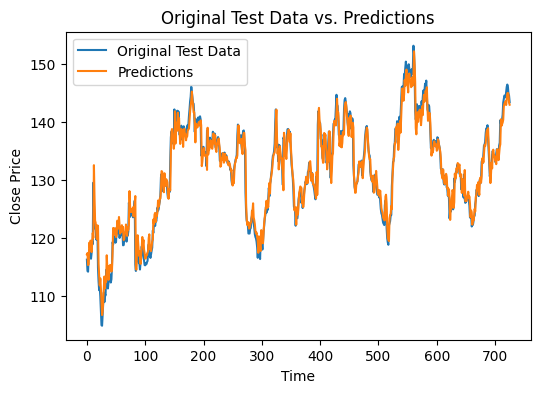

In [ ]:
plt.figure(figsize=(6, 4))

# Plot original test data
plt.plot(y_test_original, label='Original Test Data')

# Plot predicted data
plt.plot(predict_original_scale, label='Predictions')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Original Test Data vs. Predictions')
plt.legend()
plt.savefig('Mishtha test and actual prediction')
plt.show()


In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - predict_original_scale) / y_test_original)) * 100

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, predict_original_scale)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print('Testing phase model performance')
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

Testing phase model performance
RMSE: 1.89911166957086
MSE: 3.6066251335002195
MAPE: 7.542033010808594


In [ ]:
import datetime


# Assuming 'last_date' is defined properly
# Define the number of days for the next 7 days
days_in_future = 10

import pandas as pd

# Assuming 'data_M' is a DataFrame with a 'Date' column containing dates
# Convert the last date to a pandas Timestamp object
last_date = pd.to_datetime(df['Date'].iat[-1])

# Generate the list of dates for forecast of crude oil prices for  the next 7 days
next_10_days = [last_date + datetime.timedelta(days=i) for i in range(1, days_in_future + 1)]

# Assuming 'next_7_days' and 'predicted_stock_price' are defined properly

# Print the predicted prices for the next 31 days
for date, price in zip(next_10_days[:10], predict_original_scale[:10]):
    print(f"{date.date()}: {price}")


2023-08-12: [117.13518]
2023-08-13: [117.2425]
2023-08-14: [115.12743]
2023-08-15: [114.70785]
2023-08-16: [117.98081]
2023-08-17: [117.69405]
2023-08-18: [118.899025]
2023-08-19: [119.318436]
2023-08-20: [117.701035]
2023-08-21: [118.58205]


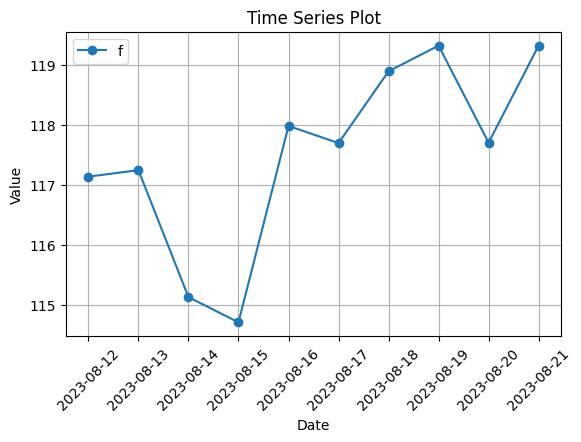

In [ ]:
import matplotlib.pyplot as plt
import datetime

# Data
dates = [
    '2023-08-12',
    '2023-08-13',
    '2023-08-14',
    '2023-08-15',
    '2023-08-16',
    '2023-08-17',
    '2023-08-18',
    '2023-08-19',
    '2023-08-20',
    '2023-08-21'
]

values = [
    117.135,
    117.2425,
    115.127,
    114.707,
    117.98,
    117.694,
    118.89,
    119.31843,
    117.701,
    118.58
]
# Convert dates to datetime objects
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]

# Create a time series plot
plt.figure(figsize=(6, 4))
plt.plot(dates, values, marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.legend('forecasting of apple stock')
plt.savefig('mishtha forecasting')
plt.show()

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## setting the start and end date
start_date = '1990-01-01'
end_date = '2023-08-22'
ticker = 'IBM'
## fetching data from yahoo
df = yf.download(ticker,start=start_date, end=end_date)
print(df)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1990-01-02   22.645794   23.452438   22.586042   23.422562   10.250030   
1990-01-03   23.601816   23.781071   23.512190   23.631693   10.341549   
1990-01-04   23.661568   23.990202   23.631693   23.900574   10.459208   
1990-01-05   23.870699   24.288958   23.781071   23.840822   10.433064   
1990-01-08   23.721319   24.109703   23.721319   23.990202   10.498430   
...                ...         ...         ...         ...         ...   
2023-08-15  141.500000  142.309998  141.199997  141.869995  141.869995   
2023-08-16  141.699997  142.089996  140.559998  140.639999  140.639999   
2023-08-17  141.009995  142.660004  140.600006  140.660004  140.660004   
2023-08-18  140.000000  141.830002  139.759995  141.410004  141.410004   
2023-08-21  141.419998  142.389999  141.110

In [5]:
df.tail(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-14,143.050003,143.369995,141.800003,141.910004,141.910004,4226400
2023-08-15,141.500000,142.309998,141.199997,141.869995,141.869995,3656600
2023-08-16,141.699997,142.089996,140.559998,140.639999,140.639999,3285300
2023-08-17,141.009995,142.660004,140.600006,140.660004,140.660004,3742100
2023-08-18,140.000000,141.830002,139.759995,141.410004,141.410004,3914700
2023-08-21,141.419998,142.389999,141.110001,142.279999,142.279999,2937800
